In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import os
import cv2

# Generate some data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Crea una cartella per le immagini
os.makedirs("kmeans_images", exist_ok=True)

# Generate images for each k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
    plt.title(f"K-means Clustering con k={k}")
    plt.savefig(f"kmeans_images/kmeans_k{k}.png")
    plt.close()

# Video creation
image_folder = 'kmeans_images'
video_name = 'kmeans_clustering.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 0.33, (width, height))

for image in sorted(images):
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()


Inerzia: 118.97884797150536


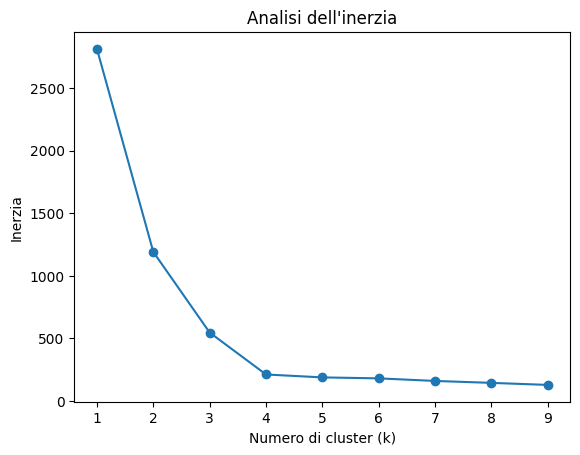

In [7]:
# Calculate inertia
inertia = kmeans.inertia_
print(f"Inerzia: {inertia}")

# Calculate inertia values for k from 1 to 10
inertia_values = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Show plot of inertia values
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Inerzia')
plt.title('Analisi dell\'inerzia')
plt.show()


In [ ]:
# Assign labels to each point in the dataset
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
